In [23]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import io
import requests
import scipy.stats as sp
import matplotlib.pyplot as plt

data = pd.read_csv("../Probs1C/healthy_lifestyle_city_2021.csv")
data

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [25]:
#renaming columns
data = data.rename(columns={
    'Sunshine hours(City)': 'sunshine',
    'Cost of a bottle of water(City)':'water_cost',
    'Obesity levels(Country)': 'obesity',
    'Life expectancy(years) (Country)': 'life_expectancy',
    'Pollution(Index score) (City)':'pollution',
    'Annual avg. hours worked':'work_hours',
    'Happiness levels(Country)':'happiness',
    'Outdoor activities(City)':'outdoor',
    'Number of take out places(City)':'takeout',
    'Cost of a monthly gym membership(City)':'gym_cost',
})

data

,City,Rank,sunshine,water_cost,obesity,life_expectancy,pollution,work_hours,happiness,outdoor,takeout,gym_cost
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [26]:
print(data.dtypes)

City                object
Rank                 int64
sunshine            object
water_cost          object
obesity             object
life_expectancy    float64
pollution           object
work_hours          object
happiness          float64
outdoor              int64
takeout              int64
gym_cost            object
dtype: object


In [27]:
##Changing dtypes to int64
data['sunshine'] = pd.to_numeric(data['sunshine'],errors='coerce')
data['water_cost'] = data['water_cost'].astype(str)
data['water_cost'] = data['water_cost'].str.replace('[\£,]', '', regex=True)
data['water_cost'] = pd.to_numeric(data['water_cost'], errors='coerce')
data['obesity'] = data['obesity'].str.replace('%', '', regex=False).astype(float) / 100
data['pollution'] = pd.to_numeric(data['pollution'],errors='coerce')
data['work_hours'] = pd.to_numeric(data['work_hours'],errors='coerce')
data['gym_cost'] = data['gym_cost'].astype(str)
data['gym_cost'] = data['gym_cost'].str.replace('[\£,]', '', regex=True)
data['gym_cost'] = pd.to_numeric(data['gym_cost'], errors='coerce')
data

,City,Rank,sunshine,water_cost,obesity,life_expectancy,pollution,work_hours,happiness,outdoor,takeout,gym_cost
0,Amsterdam,1,1858.0,1.92,0.204,81.2,30.93,1434.0,7.44,422,1048,34.90
1,Sydney,2,2636.0,1.48,0.290,82.1,26.86,1712.0,7.22,406,1103,41.66
2,Vienna,3,1884.0,1.94,0.201,81.0,17.33,1501.0,7.29,132,1008,25.74
3,Stockholm,4,1821.0,1.72,0.206,81.8,19.63,1452.0,7.35,129,598,37.31
4,Copenhagen,5,1630.0,2.19,0.197,79.8,21.24,1380.0,7.64,154,523,32.53
5,Helsinki,6,1662.0,1.60,0.222,80.4,13.08,1540.0,7.80,113,309,35.23
6,Fukuoka,7,2769.0,0.78,0.043,83.2,NaN,1644.0,5.87,35,539,55.87
7,Berlin,8,1626.0,1.55,0.223,80.6,39.41,1386.0,7.07,254,1729,26.11
8,Barcelona,9,2591.0,1.19,0.238,82.2,65.19,1686.0,6.40,585,2344,37.80
9,Vancouver,10,1938.0,1.08,0.294,81.7,24.26,1670.0,7.23,218,788,31.04


In [28]:
print(data['work_hours'].describe())

count      33.000000
mean     1672.909091
std       179.626933
min      1380.000000
25%      1540.000000
50%      1686.000000
75%      1779.000000
max      2137.000000
Name: work_hours, dtype: float64


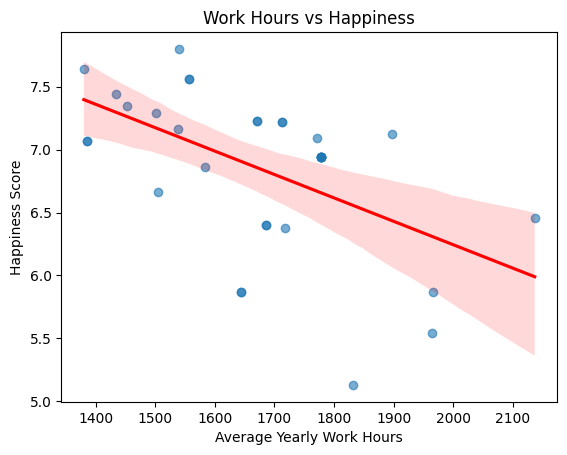

In [31]:
sns.regplot(x='work_hours', y='happiness', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Work Hours vs Happiness')
plt.xlabel('Average Yearly Work Hours')
plt.ylabel('Happiness Score')
plt.show()

In [6]:
##regression model
import statsmodels.formula.api as smf

formula = 'happiness ~ sunshine + water_cost + obesity + life_expectancy + pollution + work_hours + outdoor + takeout + gym_cost'
regression = smf.ols(formula=formula, data=data)
multi_reg = regression.fit()
print(multi_reg.summary())


                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     9.112
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.72e-05
Time:                        07:34:12   Log-Likelihood:                -3.5055
No. Observations:                  31   AIC:                             27.01
Df Residuals:                      21   BIC:                             41.35
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2933      3.033     

In [7]:
##regression model v2, removing all factors with p value <0.05 as they are not statistically significant
##these factors are sunshine, work_hours, outdoor, takeout and gym cost
import statsmodels.formula.api as smf

formula = 'happiness ~ water_cost + obesity + life_expectancy + pollution'
regression = smf.ols(formula=formula, data=data)
multi_reg = regression.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              happiness   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     49.59
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.40e-14
Time:                        07:35:01   Log-Likelihood:                -21.171
No. Observations:                  43   AIC:                             52.34
Df Residuals:                      38   BIC:                             61.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.6711      1.301     